# 1 pixel. 3 timesteps.

### You have a dataset of Earth observation satellite data. It contains the red, green, and blue bands, which are used to generate colour images. We will focus on a single pixel that has data for 3 different timesteps. We can composite (combine) these 3 timesteps into one using a statistical composition method such as `median` or `geomedian`.

### Let us compare `median` and `geomedian`.

1. #### Run this notebook by selecting `Run` -> `Restart Kernel and Run All Cells...`. Click `Restart`. The notebook may take a few minutes to finish computing.

2. #### Use the sliders to change the colour of the pixels at each timestep. Observe how this impacts the median and geomedian results.

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import xarray as xr
from odc.algo import xr_geomedian

p1r = widgets.IntSlider(description='Red', max=255, value=58)
p1g = widgets.IntSlider(description='Green', max=255, value=153)
p1b = widgets.IntSlider(description='Blue', max=255, value=68)

p2r = widgets.IntSlider(description='Red', max=255, value=208)
p2g = widgets.IntSlider(description='Green', max=255, value=221)
p2b = widgets.IntSlider(description='Blue', max=255, value=203)

p3r = widgets.IntSlider(description='Red', max=255, value=202)
p3g = widgets.IntSlider(description='Green', max=255, value=82)
p3b = widgets.IntSlider(description='Blue', max=255, value=33)

def f(p1r, p1g, p1b, p2r, p2g, p2b, p3r, p3g, p3b):
    print('Red Median = {}'.format(np.median([p1r, p2r, p3r])))
    print('Green Median = {}'.format(np.median([p1g, p2g, p3g])))
    print('Blue Median = {}'.format(np.median([p1b, p2b, p3b])))

def g(p1r, p1g, p1b, p2r, p2g, p2b, p3r, p3g, p3b):
    print('Red Geomedian = {}'.format(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).red.values.ravel()[0]))    
    print('Green Geomedian = {}'.format(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).green.values.ravel()[0]))    
    print('Blue Geomedian = {}'.format(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).blue.values.ravel()[0]))    

def h(p1r, p1g, p1b):
    fig1, axes1 = plt.subplots(figsize=(2,2))
    fig1 = plt.imshow([[(p1r, p1g, p1b)]])
    axes1.set_title('Timestep 1')
    axes1.axis('off')
    plt.show(fig1)

def hh(p2r, p2g, p2b):    
    fig2, axes2 = plt.subplots(figsize=(2,2))
    fig2 = plt.imshow([[(p2r, p2g, p2b)]])
    axes2.set_title('Timestep 2')
    axes2.axis('off')
    plt.show(fig2)
    
def hhh(p3r, p3g, p3b):    
    fig3, axes3 = plt.subplots(figsize=(2,2))
    fig3 = plt.imshow([[(p3r, p3g, p3b)]])
    axes3.set_title('Timestep 3')
    axes3.axis('off')
    plt.show(fig3)
    
def i(p1r, p1g, p1b, p2r, p2g, p2b, p3r, p3g, p3b):
    fig4, axes4 = plt.subplots(figsize=(3,3))
    fig4 = plt.imshow([[(int(np.median([p1r, p2r, p3r])), int(np.median([p1g, p2g, p3g])), int(np.median([p1b, p2b, p3b])))]])
    axes4.set_title('Median RGB - All timesteps')
    axes4.axis('off')
    plt.show(fig4)
    
def ii(p1r, p1g, p1b, p2r, p2g, p2b, p3r, p3g, p3b):
    fig5, axes5 = plt.subplots(figsize=(3,3))
    fig5 = plt.imshow([[(int(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).red.values.ravel()[0]), int(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).green.values.ravel()[0]), int(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).blue.values.ravel()[0]))]])
    axes5.set_title('Geomedian RGB - All timesteps')
    axes5.axis('off')
    plt.show(fig5)
    
def j(p1r, p1g, p1b, p2r, p2g, p2b, p3r, p3g, p3b):
    fig6 = plt.figure()
    axes6 = fig6.add_subplot(111, projection='3d')
    x = [p1r, p2r, p3r, int(np.median([p1r, p2r, p3r])), int(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).red.values.ravel()[0])]
    y = [p1g, p2g, p3g, int(np.median([p1g, p2g, p3g])), int(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).green.values.ravel()[0])]
    z = [p1b, p2b, p3b, int(np.median([p1b, p2b, p3b])), int(xr_geomedian(xr.Dataset({"red": (("x", "y", "time"), [[[np.float32(p1r), np.float32(p2r), np.float32(p3r)]]]), "green": (("x", "y", "time"), [[[np.float32(p1g), np.float32(p2g), np.float32(p3g)]]]),  "blue": (("x", "y", "time"), [[[np.float32(p1b), np.float32(p2b), np.float32(p3b)]]])})).blue.values.ravel()[0])]
    labels = [' 1', ' 2', ' 3', ' median', ' geomedian']
    axes6.scatter(x, y, z, c=['black','black','black','r', 'blue'], marker='o')
    axes6.set_xlabel('Red')
    axes6.set_ylabel('Green')
    axes6.set_zlabel('Blue')
    axes6.set_xlim3d(0, 255)
    axes6.set_ylim3d(0, 255)
    axes6.set_zlim3d(0, 255)
    for ax, ay, az, label in zip(x, y, z, labels):
        axes6.text(ax, ay, az, label)
    plt.title('Each band represents a dimension.')
    plt.show()
    
outf = widgets.interactive_output(f, {'p1r': p1r, 'p2r': p2r,'p3r': p3r, 'p1g': p1g, 'p2g': p2g,'p3g': p3g, 'p1b': p1b, 'p2b': p2b,'p3b': p3b})
outg = widgets.interactive_output(g, {'p1r': p1r, 'p2r': p2r,'p3r': p3r, 'p1g': p1g, 'p2g': p2g,'p3g': p3g, 'p1b': p1b, 'p2b': p2b,'p3b': p3b})
                        
outh = widgets.interactive_output(h, {'p1r': p1r, 'p1g': p1g, 'p1b': p1b})
outhh = widgets.interactive_output(hh, {'p2r': p2r, 'p2g': p2g, 'p2b': p2b})
outhhh = widgets.interactive_output(hhh, {'p3r': p3r, 'p3g': p3g, 'p3b': p3b})

outi = widgets.interactive_output(i, {'p1r': p1r, 'p2r': p2r,'p3r': p3r, 'p1g': p1g, 'p2g': p2g,'p3g': p3g, 'p1b': p1b, 'p2b': p2b,'p3b': p3b})
outii = widgets.interactive_output(ii, {'p1r': p1r, 'p2r': p2r,'p3r': p3r, 'p1g': p1g, 'p2g': p2g,'p3g': p3g, 'p1b': p1b, 'p2b': p2b,'p3b': p3b})

outj = widgets.interactive_output(j, {'p1r': p1r, 'p2r': p2r,'p3r': p3r, 'p1g': p1g, 'p2g': p2g,'p3g': p3g, 'p1b': p1b, 'p2b': p2b,'p3b': p3b})

widgets.HBox([widgets.VBox([widgets.HBox([outh, widgets.VBox([ p1r, p1g, p1b])]), widgets.HBox([outhh, widgets.VBox([p2r, p2g, p2b])]), widgets.HBox([outhhh, widgets.VBox([ p3r, p3g, p3b])])]), widgets.VBox([widgets.HBox([widgets.VBox([outf, outi]), widgets.VBox([outg, outii])]), outj])])

* #### The RGB colour model uses values from 0 &ndash; 255. This is the range that has been used here. Spectral datasets are scaled to fit this range.
* #### The geomedian is regarded as the better composition method as it accounts for the multi-dimensional relationship between the satellite spectral bands. This is evident in the example below. One timestep is shows a black pixel, one a white pixel, and one a fully saturated green pixel.

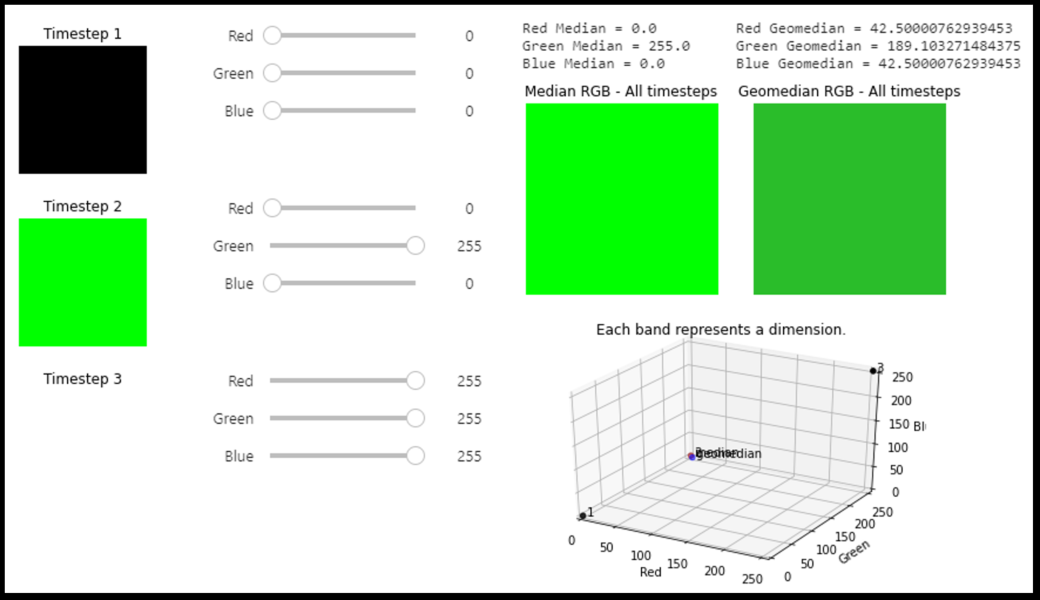

*The image above is an example of a dataset where the median and geomedian are different. Note this is a static image, not a widget.*

   * #### Consider the bands one at the time:
   
   #### The median of the red band is `median(0, 0, 255) = 0`.
   
   #### The median of the green band is `median(0, 255, 255) = 255`.
   
   #### The median of the blue band is `median(0, 0, 255) = 0`.
   
   #### Thus the `Median RGB - All timesteps` value is the same as the green pixel (`Timestep 2`).
   
   #### This does **not** account for the fact that one of the `red` values and one of the `blue` values are very large (255). Likewise, one of the `green` values is very small (0). However, this information is incorporated into the `Geomedian RGB - All timesteps` result as the geomedian formula treats each timestep as a multi-dimensional vector. We see this results in differing values between the median and geomedian.

* #### If there is only one spectral dimension (e.g. only the red band), the median and geomedian can still be different. You can try this for yourself by setting all `Green` and `Blue` sliders to `0`. Can you create a case where the red median and red geomedian are different?

*Note on hidden cells: The widget code is hidden by the `...` symbol above the widget. Clicking on it will expand the code cell. Click on the vertical blue line next to the cell to collapse it again.*